In [42]:
# http://blog.csdn.net/v_victor/article/details/50471194

In [43]:
import numpy as np
import matplotlib.pyplot as plt

class pictureshow:
    def __init__(self, data, w, b):
        self.b = b
        self.w = w
        self.data = data
        
        plt.figure(1)
        plt.title('Plot 1', size=14)
        plt.xlabel('x-axis', size=14)
        plt.ylabel('y-axis', size=14)
        
        x_data = np.linspace(0, 5, 100)
        y_data = self.expression(x_data)
        plt.plot(x_data, y_data, color='r', label='y1 data')
        
        plt.scatter(data[0][0], data[0][1], s=50)
        plt.scatter(data[1][0], data[1][1], s=50)
        plt.scatter(data[2][0], data[2][1], s=50, marker='x')
        plt.savefig('2d.png', dpi=75)
        
    def expression(self, x):
        y = (-self.b - self.w[0] * x) / self.w[1]
#         self.w[1] * y = -(self.w[0] * x + self.b)
        return y
        
    def show(self):
        plt.show()

In [44]:
class perceptron:
    def __init__(self, x, y, a=1):
        self.x = x
        self.y = y        
        self.a = a
        self.b = 0
        self.w = np.zeros((x.shape[1], 1))

    def sign(self, w, b, x):
        resutl = 0
        y = np.dot(x, w) + b
        return int(y)
        
    def train(self):
        flag = True
        length = len(self.x)
        while flag:
            count = 0
            for i in range(length):
                tmp_y = self.sign(self.w, self.b, self.x[i,:])
                if tmp_y * self.y[i] <= 0:
                    tmp = self.y[i] * self.a * self.x[i,:]
                    tmp = tmp.reshape(self.w.shape)
                    self.w = tmp + self.w
                    self.b = self.b + self.y[i]
                    count += 1
            if count == 0:
                flag = False
        return self.w, self.b

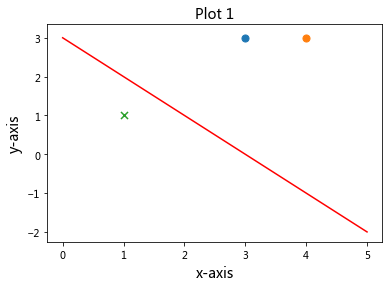

In [45]:
#原始数据  
data = [[3,3],[4,3],[1,1]]  
xArray = np.array([3,3,4,3,1,1])  
xArray = xArray.reshape((3,2))  
yArray = np.array([1,1,-1])  
#感知机计算权值  
myPerceptron = perceptron(x=xArray,y=yArray)  
weight,bias = myPerceptron.train()  
#画图  
picture = pictureshow(data,w=weight,b=bias)  
picture.show()  